# Scoring
#### Gros probleme, la variable fraude a seulement 7246 on peut avoir un modele bete que previse toujours 0....

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
data = pd.read_csv("D:\\Universita\\STatistica\\TIDE\\Deeplearn\\Scoring\\autorisations.csv")

In [3]:
data.head()

,Carte,Pays,Date,Heure,dateheure,CodeRep,MCC,Montant,fraude,FM_Velocity_Condition_3,...,FM_Sum_12,FM_Sum_24,FM_Redondance_MCC_3,FM_Redondance_MCC_6,FM_Redondance_MCC_12,FM_Redondance_MCC_24,FM_Difference_Pays_3,FM_Difference_Pays_6,FM_Difference_Pays_12,FM_Difference_Pays_24
0,0,840,02/12/2003,17:47:52,02/12/2003,15,5812,69.25,0,0,...,69.25,69.25,1,1,1,1,1,1,1,1
1,1,158,25/11/2003,06:00:20,25/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1
2,2,826,12/11/2003,14:10:57,12/11/2003,15,5211,516.95,0,0,...,516.95,516.95,1,1,1,1,1,1,1,1
3,3,840,07/11/2003,03:41:55,07/11/2003,14,7399,0.01,0,0,...,0.01,0.01,1,1,1,1,1,1,1,1
4,4,158,23/11/2003,05:07:03,23/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1


In [4]:
data.shape

(1151432, 25)

In [5]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [6]:
data["fraude"].sum()/len(data)

0.006293033370620237

In [7]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [8]:
info_df_num = data.describe()
info_types = pd.DataFrame(data.dtypes)

In [9]:
nb_nan = []
nb_distincts =[]
for v in info_df_num.columns.tolist():
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_num_2 = pd.DataFrame()
info_df_num_2 ["variables"] = info_df_num.columns.tolist()
info_df_num_2["Nb value distinct"] = nb_distincts
info_df_num_2["Nb value missing"] = nb_nan 
info_df_num_2["%Modalité_missing"] = info_df_num_2["Nb value missing"]/len(data)

print(info_df_num_2)

                   variables  Nb value distinct  Nb value missing  \
0                      Carte             198044                 0   
1                       Pays                167                 0   
2                    CodeRep                 15                 0   
3                        MCC                661                 0   
4                    Montant              81202                 0   
5                     fraude                  2                 0   
6    FM_Velocity_Condition_3                 47                 0   
7    FM_Velocity_Condition_6                 82                 0   
8   FM_Velocity_Condition_12                111                 0   
9   FM_Velocity_Condition_24                130                 0   
10                  FM_Sum_3             109836                 0   
11                  FM_Sum_6             115524                 0   
12                 FM_Sum_12             121192                 0   
13                 FM_Sum_24      

In [10]:
list_var_cat = info_types[info_types[0]=="object"].index.tolist()

info_df_cat = pd.DataFrame()
nb_nan = []
nb_distincts =[]
for v in list_var_cat :
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_cat["variables"] = list_var_cat
info_df_cat["Nb value distinct"] = nb_distincts
info_df_cat["Nb value missing"] = nb_nan

print(info_df_cat)

   variables  Nb value distinct  Nb value missing
0       Date                243                 0
1      Heure              85697                 0
2  dateheure                243                 0


In [11]:
data["Heure"] = data["Heure"].str.split(':', expand=True)[0]
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')
data["Month"] = data["Date"].dt.month
data["Month"] = data["Month"].astype('object')
data["CodeRep"]=np.where(data["CodeRep"] == 0,1,0)
continents = pd.read_excel("D:\\Universita\\STatistica\\TIDE\\Deeplearn\\Scoring\\continents.xlsx", index_col = "Code numérique")
data["Continent"] = data['Pays'].map(continents["Continent"])
data["Continent"] = np.where(data["Pays"]==891, 'Europe', data["Continent"])
data["Continent"] = np.where(data["Pays"]==530, 'Amérique du Nord', data["Continent"])
data["Continent"] = np.where((data["Pays"]==999)|(data["Pays"]==900), 'Unknown', data["Continent"])
data["FD"] = data['Pays'].map(continents["FD"])
data["FD"] = np.where((data["FD"].isna()) & (data["Continent"]=='Europe'), 0.502679705619812, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & ((data["Continent"]=='Asie')|(data["Continent"]=='Océanie')), 0.350481420755386, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & (data["Continent"]=='Afrique'), 0.1582290828228, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & ((data["Continent"]=='Amérique du Nord')|(data["Continent"]=='Amérique du Sud')), 0.324424803256989, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & (data["Continent"]=='Unknown'), 0.319519817829132, data["FD"])

In [12]:
data=data.loc[data['Montant']<100000]
data=data.loc[data['FM_Sum_3']<400000]
data=data.loc[data['FM_Sum_6']<400000]
data=data.loc[data['FM_Sum_12']<400000]

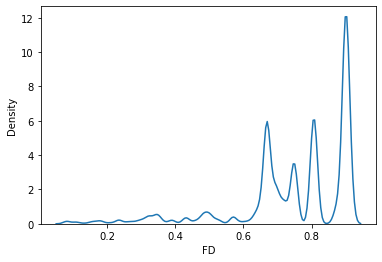

In [13]:
sns.kdeplot(data["FD"]);

In [14]:
data.columns

Index(['Carte', 'Pays', 'Date', 'Heure', 'dateheure', 'CodeRep', 'MCC',
       'Montant', 'fraude', 'FM_Velocity_Condition_3',
       'FM_Velocity_Condition_6', 'FM_Velocity_Condition_12',
       'FM_Velocity_Condition_24', 'FM_Sum_3', 'FM_Sum_6', 'FM_Sum_12',
       'FM_Sum_24', 'FM_Redondance_MCC_3', 'FM_Redondance_MCC_6',
       'FM_Redondance_MCC_12', 'FM_Redondance_MCC_24', 'FM_Difference_Pays_3',
       'FM_Difference_Pays_6', 'FM_Difference_Pays_12',
       'FM_Difference_Pays_24', 'Month', 'Continent', 'FD'],
      dtype='object')

In [86]:
group = data.iloc[:,9:25]

FM_Velocity_Condition_3  FM_Velocity_Condition_6  \
fraude                                                           
0      count             1.144185e+06             1.144185e+06   
       mean              1.232719e+00             1.316121e+00   
       std               8.739281e-01             1.128079e+00   
       min               0.000000e+00             0.000000e+00   
       25%               1.000000e+00             1.000000e+00   
       50%               1.000000e+00             1.000000e+00   
       75%               1.000000e+00             1.000000e+00   
       max               4.600000e+01             8.100000e+01   
1      count             7.246000e+03             7.246000e+03   
       mean              2.498482e+00             3.035882e+00   
       std               3.269270e+00             4.372299e+00   
       min               0.000000e+00             0.000000e+00   
       25%               1.000000e+00             1.000000e+00   
       50%               1.000000e+00             2.000000e+00   
       75%               3.000000e+00             4.000000e+00   
       max               4.500000e+01             7.800000e+01   

              FM_Velocity_Condition_12  FM_Velocity_Condition_24  
fraude                                                            
0      count              1.144185e+06              1.144185e+06  
       mean               1.401253e+00              1.633374e+00  
       std                1.394400e+00              2.018601e+00  
       min                0.000000e+00              0.000000e+00  
       25%                1.000000e+00              1.000000e+00  
       50%                1.000000e+00              1.000000e+00  
       75%                2.000000e+00              2.000000e+00  
       max                1.100000e+02              1.290000e+02  
1      count              7.246000e+03              7.246000e+03  
       mean               3.416782e+00              4.416368e+00  
       std                4.954525e+00              6.387864e+00  
       min                0.000000e+00              0.000000e+00  
       25%                1.000000e+00              1.000000e+00  
       50%                2.000000e+00              2.000000e+00  
       75%                4.000000e+00              5.000000e+00  
       max                1.080000e+02              1.270000e+02

In [102]:
group.iloc[:,:4].groupby(data["fraude"]).describe().loc[:,(slice(None),['min','25%','50%','75%','max','mean','std'])].T.unstack()

fraude                      0                                              1  \
                          min  25%  50%  75%    max      mean       std  min   
FM_Velocity_Condition_3   0.0  1.0  1.0  1.0   46.0  1.232719  0.873928  0.0   
FM_Velocity_Condition_6   0.0  1.0  1.0  1.0   81.0  1.316121  1.128079  0.0   
FM_Velocity_Condition_12  0.0  1.0  1.0  2.0  110.0  1.401253  1.394400  0.0   
FM_Velocity_Condition_24  0.0  1.0  1.0  2.0  129.0  1.633374  2.018601  0.0   

fraude                                                              
                          25%  50%  75%    max      mean       std  
FM_Velocity_Condition_3   1.0  1.0  3.0   45.0  2.498482  3.269270  
FM_Velocity_Condition_6   1.0  2.0  4.0   78.0  3.035882  4.372299  
FM_Velocity_Condition_12  1.0  2.0  4.0  108.0  3.416782  4.954525  
FM_Velocity_Condition_24  1.0  2.0  5.0  127.0  4.416368  6.387864

In [106]:
group.iloc[:,4:8].groupby(data["fraude"]).describe().loc[:,(slice(None),['min','25%','50%','75%','max','mean','std'])].T.unstack()

fraude       0                                                            \
           min    25%    50%     75%        max        mean          std   
FM_Sum_3   0.0  29.18  60.94  150.00  360892.24  208.328739  1377.900102   
FM_Sum_6   0.0  30.00  64.95  160.60  360892.24  223.839695  1414.378372   
FM_Sum_12  0.0  31.00  68.50  171.27  360892.24  239.610373  1458.028515   
FM_Sum_24  0.0  34.13  78.80  200.00  546500.70  287.715009  2182.596740   

fraude        1                                                     \
            min      25%     50%        75%       max         mean   
FM_Sum_3   0.01  50.0000  207.00   861.5725  45653.12   851.380366   
FM_Sum_6   0.01  58.4125  259.93  1089.5525  45653.12  1042.039349   
FM_Sum_12  0.01  68.4675  308.77  1230.4625  45653.12  1212.969226   
FM_Sum_24  0.01  99.2200  442.46  1589.7300  45653.12  1587.102510   

fraude                  
                   std  
FM_Sum_3   2022.961727  
FM_Sum_6   2332.296469  
FM_Sum_12  2659.620264  
FM_Sum_24  3489.328066

In [104]:
group.iloc[:,8:12].groupby(data["fraude"]).describe().loc[:,(slice(None),['min','25%','50%','75%','max','mean','std'])].T.unstack()

fraude                  0                                             1       \
                      min  25%  50%  75%   max      mean       std  min  25%   
FM_Redondance_MCC_3   1.0  1.0  1.0  1.0  39.0  1.122444  0.626367  1.0  1.0   
FM_Redondance_MCC_6   1.0  1.0  1.0  1.0  39.0  1.148365  0.737369  1.0  1.0   
FM_Redondance_MCC_12  1.0  1.0  1.0  1.0  46.0  1.180477  0.973389  1.0  1.0   
FM_Redondance_MCC_24  1.0  1.0  1.0  1.0  59.0  1.257427  1.505873  1.0  1.0   

fraude                                                    
                      50%  75%   max      mean       std  
FM_Redondance_MCC_3   1.0  2.0  21.0  1.653740  1.605384  
FM_Redondance_MCC_6   1.0  2.0  30.0  1.801684  1.980652  
FM_Redondance_MCC_12  1.0  2.0  43.0  1.919956  2.228666  
FM_Redondance_MCC_24  1.0  2.0  47.0  2.180513  2.604977

In [105]:
group.iloc[:,12:16].groupby(data["fraude"]).describe().loc[:,(slice(None),['min','25%','50%','75%','max','mean','std'])].T.unstack()

fraude                   0                                             1       \
                       min  25%  50%  75%   max      mean       std  min  25%   
FM_Difference_Pays_3   1.0  1.0  1.0  1.0  10.0  1.055724  0.276474  1.0  1.0   
FM_Difference_Pays_6   1.0  1.0  1.0  1.0  15.0  1.071101  0.333385  1.0  1.0   
FM_Difference_Pays_12  1.0  1.0  1.0  1.0  15.0  1.087350  0.388626  1.0  1.0   
FM_Difference_Pays_24  1.0  1.0  1.0  1.0  17.0  1.126105  0.516217  1.0  1.0   

fraude                                                    
                       50%  75%  max      mean       std  
FM_Difference_Pays_3   1.0  1.0  5.0  1.154430  0.449552  
FM_Difference_Pays_6   1.0  1.0  6.0  1.196246  0.528672  
FM_Difference_Pays_12  1.0  1.0  6.0  1.231438  0.574940  
FM_Difference_Pays_24  1.0  1.0  7.0  1.310930  0.718144

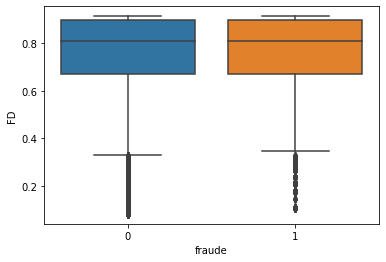

In [15]:
sns.boxplot(data=data, x="fraude", y="FD");

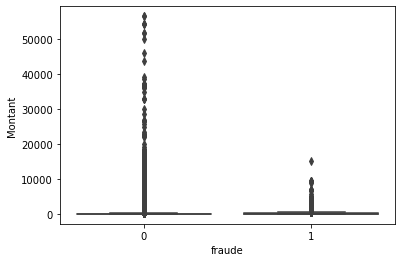

In [16]:
sns.boxplot(data=data, x="fraude", y="Montant");

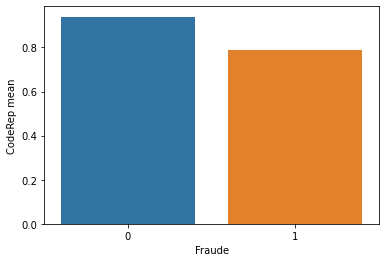

In [137]:
ax = sns.barplot(x=[0,1], y=list(data["CodeRep"].groupby(data["fraude"]).mean().values))
ax.set(xlabel='Fraude', ylabel='CodeRep mean');

In [138]:
data["CodeRep"].groupby(data["fraude"]).mean()

fraude
0    0.939318
1    0.786641
Name: CodeRep, dtype: float64

# Division of test and train data.
Is it necessary to do it before analysing for possible seasonalities or country risk?

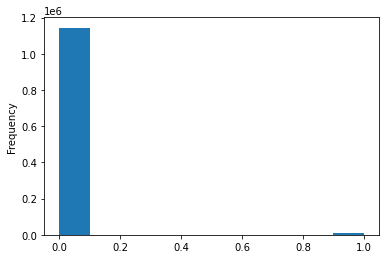

In [13]:
data["fraude"].plot(kind = 'hist');

In [14]:
X = data.drop(columns=["fraude","Carte", "Date", "dateheure", "MCC"])
Y = data["fraude"]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3, stratify=Y)
train = X_train.join(Y_train)

## Is there a country specific risk involved?

In [16]:
summa= train.groupby("Pays").sum()[["fraude"]]
summa.sort_values(by="fraude")

,fraude
Pays,
8,0
508,0
498,0
496,0
492,0
...,...
56,385
380,498
840,633


In [17]:
counts = pd.Series(train["Pays"]).value_counts()
counts = pd.DataFrame(counts)
counts = counts.rename(columns={"Pays":"NTrans"})

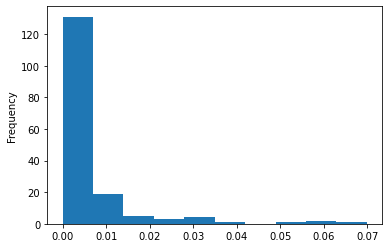

In [18]:
cmerged = pd.merge(counts,summa,left_index=True, right_index=True)
cmerged.reset_index(inplace=True)
cmerged = cmerged.rename(columns={"index":"Pays"})
cmerged["Fratio"] = cmerged["fraude"]/cmerged["NTrans"]
cmerged["Fratio"].plot(kind = 'hist');

In [19]:
sum(cmerged["Fratio"]>0.025)

12

In [20]:
cmerged[(cmerged["Fratio"]>0.025)]

,Pays,NTrans,fraude,Fratio
13,36,5578,149,0.026712
14,76,5152,268,0.052019
16,792,4281,251,0.058631
36,40,1970,50,0.025381
37,356,1840,54,0.029348
54,188,848,29,0.034198
65,608,566,19,0.033569
68,158,452,12,0.026549
80,320,251,9,0.035857
94,218,143,10,0.069930


D:\Users\alepi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


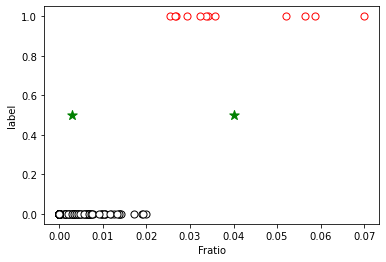

In [21]:
kmeans = KMeans(n_clusters=2)
cmerged['label'] = kmeans.fit_predict(cmerged[['Fratio']])
ax = cmerged[cmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
cmerged[cmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [22]:
cmerged[cmerged['label']==1]

,Pays,NTrans,fraude,Fratio,label
13,36,5578,149,0.026712,1
14,76,5152,268,0.052019,1
16,792,4281,251,0.058631,1
36,40,1970,50,0.025381,1
37,356,1840,54,0.029348,1
54,188,848,29,0.034198,1
65,608,566,19,0.033569,1
68,158,452,12,0.026549,1
80,320,251,9,0.035857,1
94,218,143,10,0.069930,1


In [23]:
# K-Means and a 0.025 threshold level bring the same result

#### And the high risk countries are: Australia (36), Brasil (76), Turkey (792), India (356), Costa Rica (188), Philippines (608), Taiwan (158), Guatemala (320), Ecuador (218), Venezuela (862).

In [24]:
X_train["Pays_ris"]=0

In [25]:
X_train["Pays_ris"]=0
#conditions = [X_train.Pays==36, X_train.Pays==76, X_train.Pays==792, X_train.Pays==356, X_train.Pays==188,
#                                X_train.Pays==608, X_train.Pays==158, X_train.Pays==320, X_train.Pays==218, X_train.Pays==862]
X_train['AUX1'] = np.where(np.logical_or(X_train.Pays==36, X_train.Pays==76, X_train.Pays==792)
                               ,1, 0)
X_train['AUX2'] = np.where(np.logical_or(X_train.Pays==356, X_train.Pays==188, X_train.Pays==608)
                               ,1, 0)
X_train['AUX3'] = np.where(np.logical_or(X_train.Pays==158, X_train.Pays==320, X_train.Pays==218)
                               ,1, 0)
X_train['AUX4'] = np.where(X_train.Pays==862,1,0)
X_train['AUX12'] = np.where(np.logical_or(X_train.AUX1==1, X_train.AUX2==1)
                               ,1, 0)
X_train['Pays_ris'] = np.where(np.logical_or(X_train.AUX12==1, X_train.AUX3==1, X_train.AUX4==1)
                               ,1, 0)
X_train = X_train.drop(columns=["AUX1","AUX2", "AUX3", "AUX4", "AUX12","Pays"])

In [26]:
X_test["Pays_ris"]=0
X_test['AUX1'] = np.where(np.logical_or(X_test.Pays==36, X_test.Pays==76, X_test.Pays==792)
                               ,1, 0)
X_test['AUX2'] = np.where(np.logical_or(X_test.Pays==356, X_test.Pays==188, X_test.Pays==608)
                               ,1, 0)
X_test['AUX3'] = np.where(np.logical_or(X_test.Pays==158, X_test.Pays==320, X_test.Pays==218)
                               ,1, 0)
X_test['AUX4'] = np.where(X_test.Pays==862,1,0)
X_test['AUX12'] = np.where(np.logical_or(X_test.AUX1==1, X_test.AUX2==1)
                               ,1, 0)
X_test['Pays_ris'] = np.where(np.logical_or(X_test.AUX12==1, X_test.AUX3==1, X_test.AUX4==1)
                               ,1, 0)
X_test = X_test.drop(columns=["AUX1","AUX2", "AUX3", "AUX4", "AUX12","Pays"])

In [27]:
sum(X_train["Pays_ris"])/len(X_train)

0.017519829379864293

In [28]:
sum(X_test["Pays_ris"])/len(X_test)

0.017572301189821383

## Verifying if there are clusters in the hours of the day.

In [29]:
sumh= train.groupby("Heure").sum()[["fraude"]]
sumh.sort_values(by="fraude")

,fraude
Heure,
05,61
06,74
07,90
04,92
08,92
03,108
09,130
02,141
01,146


In [30]:
counth = pd.Series(train["Heure"]).value_counts()
counth = pd.DataFrame(counth)
counth = counth.rename(columns={"Heure":"NTrans"})

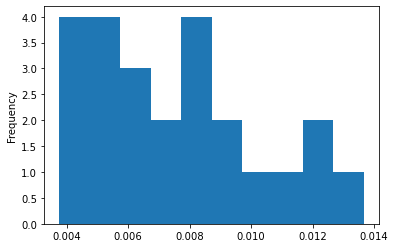

In [31]:
hmerged = pd.merge(counth, sumh, left_index=True, right_index=True)
hmerged.reset_index(inplace=True)
hmerged = hmerged.rename(columns={"index":"Heure"})
hmerged["Fratio"] = hmerged["fraude"]/hmerged["NTrans"]
hmerged["Fratio"].plot(kind = 'hist');

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


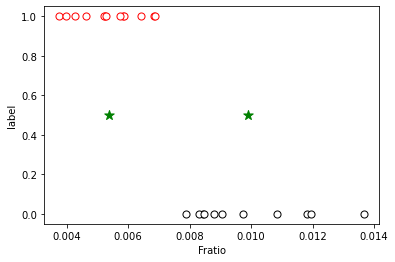

In [32]:
kmeans = KMeans(n_clusters=2)
hmerged['label'] = kmeans.fit_predict(hmerged[['Fratio']])
ax = hmerged[hmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
hmerged[hmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [33]:
hmerged[hmerged['label']==1]

,Heure,NTrans,fraude,Fratio,label
0,16,66326,348,0.005247,1
1,15,66075,345,0.005221,1
2,17,65266,380,0.005822,1
3,14,57680,304,0.005270,1
4,18,55425,325,0.005864,1
5,11,54905,254,0.004626,1
6,12,53068,341,0.006426,1
7,13,48556,278,0.005725,1
8,10,47204,202,0.004279,1
10,09,34493,130,0.003769,1


Fraudes are more frequent during night hours even if it is possible that they are constant during the day and the thing which changes the most is the number of transactions during the day.

## Checking possible seasonalities.

In [34]:
summ= train.groupby("Month").sum()[["fraude"]]
summ.sort_values(by="fraude")

,fraude
Month,
4,481
2,545
11,572
3,608
5,671
1,703
12,736
6,756


In [35]:
mcount = pd.Series(train["Month"]).value_counts()
mcount = pd.DataFrame(mcount)
mcount = mcount.rename(columns={"Month":"NTrans"})

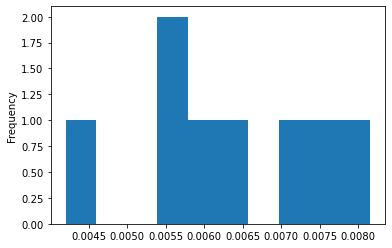

In [36]:
mmerged = pd.merge(mcount, summ, left_index=True, right_index=True)
mmerged.reset_index(inplace=True)
mmerged = mmerged.rename(columns={"index":"Month"})
mmerged["Fratio"] = mmerged["fraude"]/mmerged["NTrans"]
mmerged["Fratio"].plot(kind = 'hist');

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


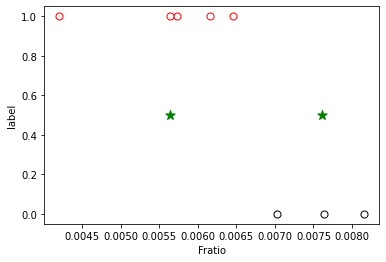

In [37]:
kmeans = KMeans(n_clusters=2)
mmerged['label'] = kmeans.fit_predict(mmerged[['Fratio']])
ax = mmerged[mmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
mmerged[mmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [38]:
mmerged[mmerged['label']==1]

,Month,NTrans,fraude,Fratio,label
0,5,119066,671,0.005636,1
1,4,114407,481,0.004204,1
3,3,98731,608,0.006158,1
5,2,95061,545,0.005733,1
6,11,88615,572,0.006455,1


In [39]:
mmerged[mmerged['label']==0]

,Month,NTrans,fraude,Fratio,label
2,6,107542,756,0.007030,0
4,12,96345,736,0.007639,0
7,1,86234,703,0.008152,0


In this case I can't see a difference in frauds given the month.

## Modelisation

In [40]:
X_train = X_train.drop(columns=["Heure","Month","Continent"]) # Can be held eventually
X_test = X_test.drop(columns=["Heure","Month", "Continent"]) # Can be held eventually

## Random Forest for base model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer,Categorical
from timeit import default_timer as timer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [41]:
# param_dict_bayes_RF = {
#     'n_estimators' : Integer(10,200),
#     'criterion': Categorical(['gini', 'entropy']), 
#     'max_depth': Integer(3,10),
#     'bootstrap':Categorical([True,False])}

# NB_ITER = 5

# opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

# start = timer()  
# opt.fit(X_train, Y_train)
# delais = timer()- start
# best_param_opti_bayes = opt.best_params_
# best_score_opti_bayes = opt.best_score_
# all_result_opti_bayes = opt.cv_results_
# print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
# print(" \n Durée de recherche en seconde :")
# print(delais)
# print("\n Paramètres optimaux : ")
# best_param_opti_bayes =opt.best_params_
# print(best_param_opti_bayes)
# best_score_opti_bayes = opt.best_score_
# print("\n Résultats  : " + str(best_score_opti_bayes))

In [42]:
# rf_clf = RandomForestClassifier(**opt.best_params_)

# rf_clf.fit(X_train,Y_train)

# #Calcul des métriques

# fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_train, rf_clf.predict_proba(X_train)[:,1])
# roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

# fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test)[:,1])
# roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

# plt.figure()
# lw = 2
# plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
#          lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
# plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
#          lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Comparaison courve ROC Train ')
# plt.legend(loc="lower right")
# plt.show()



# ### COURBES PRECISION RAPPEL

# precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_train,
#                                                                          rf_clf.predict_proba(X_train)[:,1])

# precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
#                                                                          rf_clf.predict_proba(X_test)[:,1])

# plt.figure()
# lw = 2
# plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
#          lw=lw, label='Train - RF')
# plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
#          lw=lw, label='Test - RF')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Comparaison courbe PRECISION / RAPPEL')
# plt.legend(loc="lower left")
# plt.show()

In [43]:
# importance_variable_rf = pd.DataFrame()
# importance_variable_rf["Variable"]= X_train.columns.tolist()
# importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

# importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

# print("Les 10 variables les plus importantes : \n")
# importance_variable_rf.head(10)

### Without country risk

In [42]:
X_train2 = X_train.drop(columns=["Pays_ris"]) # Can be held eventually
X_test2 = X_test.drop(columns=["Pays_ris"]) # Can be held eventually

In [49]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train2, Y_train)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
2337.3084000999997

 Paramètres optimaux : 
OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 8), ('n_estimators', 161)])

 Résultats  : 0.8118506437929076


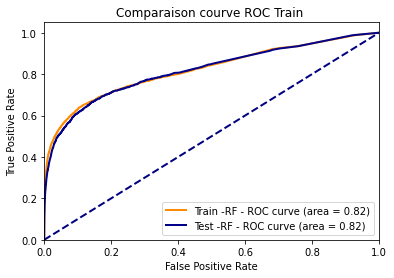

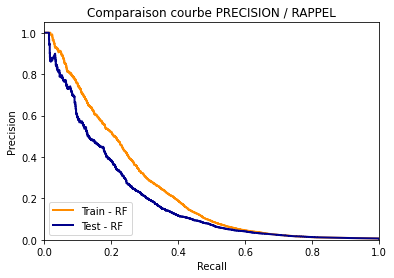

In [50]:
rf_clf = RandomForestClassifier(**opt.best_params_)

rf_clf.fit(X_train2,Y_train)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_train, rf_clf.predict_proba(X_train2)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_train,
                                                                         rf_clf.predict_proba(X_train2)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
                                                                         rf_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [53]:
importance_variable_rf = pd.DataFrame()
importance_variable_rf["Variable"]= X_train2.columns.tolist()
importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 10 variables les plus importantes : \n")
importance_variable_rf.head(10)

Les 10 variables les plus importantes : 



,Variable,Feature Importance
5,FM_Velocity_Condition_24,0.148670
9,FM_Sum_24,0.142235
4,FM_Velocity_Condition_12,0.104916
8,FM_Sum_12,0.102081
3,FM_Velocity_Condition_6,0.077726
7,FM_Sum_6,0.065147
2,FM_Velocity_Condition_3,0.057726
18,FD,0.041825
1,Montant,0.041258
6,FM_Sum_3,0.036072


<Figure size 504x504 with 0 Axes>

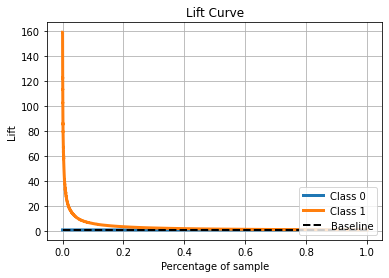

In [51]:
plt.figure(figsize=(7,7))
Y_predict_proba = rf_clf.predict_proba(X_test2)
skplt.metrics.plot_lift_curve(Y_test,Y_predict_proba  )
plt.show()
plt.show()

In [54]:
res_modele=pd.DataFrame()
res_modele["Target"]=Y_test
res_modele["Proba_target"]=rf_clf.predict_proba(X_test2)[:,1]

res_modele.sort_values(by =["Proba_target"], inplace = True,ascending=False)

res_modele['QuantileRank']= pd.qcut(res_modele["Proba_target"], q = 5, labels = False)
res_modele.head(7)

,Target,Proba_target,QuantileRank
999600,1,0.738188,4
999601,1,0.730752,4
999608,1,0.721582,4
472787,1,0.712127,4
1110464,1,0.711481,4
472779,1,0.711332,4
999611,1,0.708912,4


In [55]:
agg_tmp=pd.DataFrame(res_modele.groupby('QuantileRank')['Target'].agg(['sum','count']))

agg_tmp.sort_values(by =["QuantileRank"], inplace = True,ascending=False)

print(agg_tmp)

               sum  count
QuantileRank             
4             1538  69067
3              216  67663
2              126  51408
1              153  74471
0              141  82821


In [56]:
agg_tmp["Precision"] = agg_tmp["sum"]/agg_tmp["count"]
agg_tmp["Proba_alatoire"]= Y_test.mean()
agg_tmp["lift"]=agg_tmp["Precision"]/agg_tmp["Proba_alatoire"]
agg_tmp["Part population cible"]=agg_tmp["sum"]/Y_test.sum()
agg_tmp["Part population"]=agg_tmp["count"]/Y_test.count()
print(agg_tmp)

               sum  count  Precision  Proba_alatoire      lift  \
QuantileRank                                                     
4             1538  69067   0.022268        0.006294  3.538232   
3              216  67663   0.003192        0.006294  0.507228   
2              126  51408   0.002451        0.006294  0.389440   
1              153  74471   0.002054        0.006294  0.326441   
0              141  82821   0.001702        0.006294  0.270507   

              Part population cible  Part population  
QuantileRank                                          
4                          0.707452         0.199945  
3                          0.099356         0.195880  
2                          0.057958         0.148823  
1                          0.070377         0.215589  
0                          0.064857         0.239762  


### Trying resampling techniques

In [58]:
over_sampler = SMOTE(k_neighbors=2)
X_res, Y_res = over_sampler.fit_resample(X_train2, Y_train)
print(f"Training target statistics: {Counter(Y_res)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 800930, 1: 800930})
Testing target statistics: Counter({0: 343256, 1: 2174})


In [59]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_res, Y_res)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
6453.647114800001

 Paramètres optimaux : 
OrderedDict([('bootstrap', False), ('criterion', 'gini'), ('max_depth', 6), ('n_estimators', 164)])

 Résultats  : 0.8595681674512882


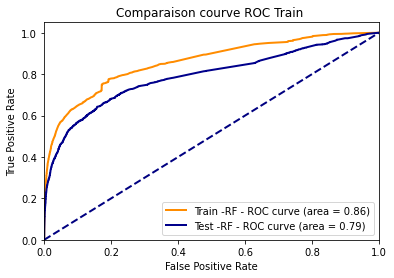

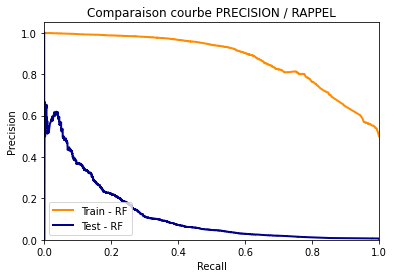

In [60]:
rf_clf = RandomForestClassifier(**opt.best_params_)
# rf_clf = RandomForestClassifier(bootstrap=True, criterion = "entropy", max_depth=8,n_estimators=199)
rf_clf.fit(X_res,Y_res)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_res, rf_clf.predict_proba(X_res)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_res,
                                                                         rf_clf.predict_proba(X_res)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
                                                                         rf_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [61]:
importance_variable_rf = pd.DataFrame()
importance_variable_rf["Variable"]= X_res.columns.tolist()
importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 10 variables les plus importantes : \n")
importance_variable_rf.head(10)

Les 10 variables les plus importantes : 



,Variable,Feature Importance
9,FM_Sum_24,0.204222
18,FD,0.125505
0,CodeRep,0.109439
8,FM_Sum_12,0.105540
7,FM_Sum_6,0.099255
5,FM_Velocity_Condition_24,0.087581
3,FM_Velocity_Condition_6,0.054700
4,FM_Velocity_Condition_12,0.051976
6,FM_Sum_3,0.049370
2,FM_Velocity_Condition_3,0.044271


<Figure size 504x504 with 0 Axes>

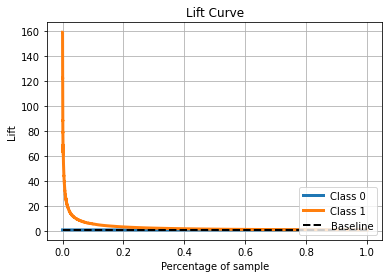

In [48]:
plt.figure(figsize=(7,7))
Y_predict_proba = rf_clf.predict_proba(X_test2)
skplt.metrics.plot_lift_curve(Y_test,Y_predict_proba  )
plt.show()
plt.show();

In [49]:
res_modele=pd.DataFrame()
res_modele["Target"]=Y_test
res_modele["Proba_target"]=rf_clf.predict_proba(X_test2)[:,1]

res_modele.sort_values(by =["Proba_target"], inplace = True,ascending=False)

res_modele['QuantileRank']= pd.qcut(res_modele["Proba_target"], q = 5, labels = False)
res_modele.head(7)

,Target,Proba_target,QuantileRank
1110463,1,0.993002,4
130801,1,0.992729,4
883929,1,0.992671,4
472786,1,0.992490,4
182279,1,0.992237,4
237373,1,0.992154,4
472790,1,0.992123,4


In [51]:
agg_tmp=pd.DataFrame(res_modele.groupby('QuantileRank')['Target'].agg(['sum','count']))

agg_tmp.sort_values(by =["QuantileRank"], inplace = True,ascending=False)

print(agg_tmp)

               sum  count
QuantileRank             
4             1470  69012
3              183  58236
2              173  80008
1              197  69088
0              151  69086


In [52]:
agg_tmp["Precision"] = agg_tmp["sum"]/agg_tmp["count"]
agg_tmp["Proba_alatoire"]= Y_test.mean()
agg_tmp["lift"]=agg_tmp["Precision"]/agg_tmp["Proba_alatoire"]
agg_tmp["Part population cible"]=agg_tmp["sum"]/Y_test.sum()
agg_tmp["Part population"]=agg_tmp["count"]/Y_test.count()
print(agg_tmp)

               sum  count  Precision  Proba_alatoire      lift  \
QuantileRank                                                     
4             1470  69012   0.021301        0.006294  3.384490   
3              183  58236   0.003142        0.006294  0.499298   
2              173  80008   0.002162        0.006294  0.343568   
1              197  69088   0.002851        0.006294  0.453069   
0              151  69086   0.002186        0.006294  0.347286   

              Part population cible  Part population  
QuantileRank                                          
4                          0.676173         0.199786  
3                          0.084177         0.168590  
2                          0.079577         0.231619  
1                          0.090616         0.200006  
0                          0.069457         0.200000  


## Saleha code testing

In [43]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pickle

D:\Users\alepi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [44]:
var_app = X_train2.columns.tolist()
NB_ITER = 5

In [62]:
param_dict_XGB = {
    'objective':Categorical(['binary:logistic']),
    'booster':Categorical(['gblinear','gbtree','dart']), #,'gbtree','dart'
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'learning_rate' : Real(0.05,1, prior='uniform'),
    'label' : var_app}

opt = BayesSearchCV(xgb.XGBClassifier(),param_dict_XGB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train2, Y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))


xgb_clf = xgb.XGBClassifier(**opt.best_params_)

xgb_clf.fit(X_train2,Y_train)

D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:28:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:28:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:28:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:28:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:29:15] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:29:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:29:41] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:29:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:30:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:30:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:30:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:30:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:32:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:32:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:33:44] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:33:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:35:31] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:35:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:37:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:37:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:38:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:38:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:38:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:38:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:39:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:39:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:39:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:39:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:39:13] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:39:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[15:39:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:39:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:41:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:41:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:42:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:42:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:44:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:44:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:46:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:46:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:47:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:47:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:49:31] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:49:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:51:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:52:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:54:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:54:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:56:13] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:56:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### 
 
 Durée de recherche en seconde :
1794.7705489

 Paramètres optimaux : 
OrderedDict([('base_estimator', DecisionTreeClassifier()), ('booster', 'dart'), ('label', 'FM_Difference_Pays_12'), ('learning_rate', 0.14570250415258335), ('objective', 'binary:logistic')])

 Résultats  : 0.8271695732971296
[15:58:17] WARNIN

XGBClassifier(base_estimator=DecisionTreeClassifier(), base_score=0.5,
              booster='dart', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              label='FM_Difference_Pays_12', learning_rate=0.14570250415258335,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

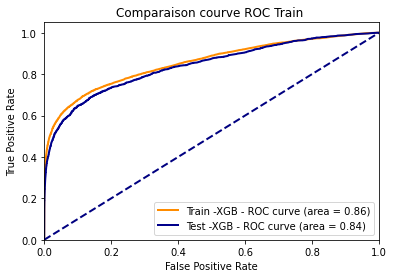

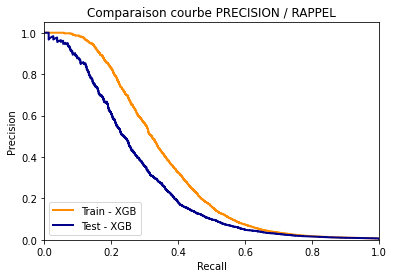

In [63]:
#Calcul des métriques

fpr_train_XGB, tpr_train_XGB, thresholds_train_XGB = roc_curve(Y_train, xgb_clf.predict_proba(X_train2)[:,1])
roc_auc_train_XGB = auc(fpr_train_XGB, tpr_train_XGB)

fpr_test_XGB, tpr_test_XGB, thresholds_test_XGB = roc_curve(Y_test, xgb_clf.predict_proba(X_test2)[:,1])
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)

plt.figure()
lw = 2
plt.plot(fpr_train_XGB, tpr_train_XGB, color='darkorange',
         lw=lw, label='Train -XGB - ROC curve (area = %0.2f)' % roc_auc_train_XGB)
plt.plot(fpr_test_XGB, tpr_test_XGB, color='darkblue',
         lw=lw, label='Test -XGB - ROC curve (area = %0.2f)' % roc_auc_test_XGB)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_XGB, recall_train_XGB, thresholds_train_XGB = precision_recall_curve(Y_train,
                                                                         xgb_clf.predict_proba(X_train2)[:,1])

precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(Y_test,
                                                                         xgb_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_XGB,precision_train_XGB, color='darkorange',
         lw=lw, label='Train - XGB')
plt.plot(recall_test_XGB,precision_test_XGB, color='darkblue',
         lw=lw, label='Test - XGB')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [64]:
precision, recall, thresholds = precision_recall_curve(Y_test, xgb_clf.predict_proba(X_test2)[:,1])
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.123470, F-Score=0.330


## Undersampling with Tomek links

In [53]:
from imblearn.under_sampling import TomekLinks
# Undersampling / Tomek Links

undersample = TomekLinks()
X_TL, Y_TL = undersample.fit_resample(X_train2, Y_train)

print(f"Training target statistics: {Counter(Y_TL)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 799073, 1: 5072})
Testing target statistics: Counter({0: 343256, 1: 2174})


In [54]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_TL, Y_TL)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
1546.1582010000002

 Paramètres optimaux : 
OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 10), ('n_estimators', 83)])

 Résultats  : 0.8152507392743138


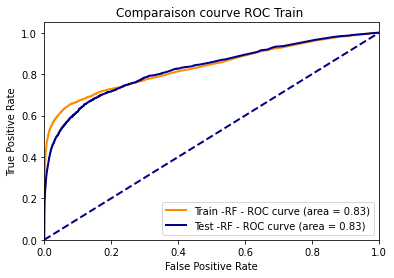

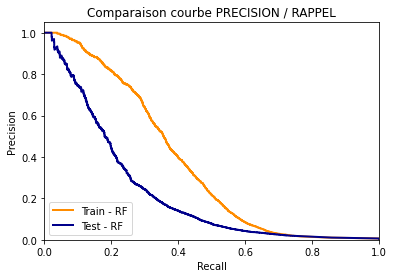

In [55]:
rf_clf = RandomForestClassifier(**opt.best_params_)
rf_clf.fit(X_TL,Y_TL)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_TL, rf_clf.predict_proba(X_TL)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_TL,
                                                                         rf_clf.predict_proba(X_TL)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
                                                                         rf_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [56]:
Y_pred=rf_clf.predict(X_test2)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[343225     31]
 [  2024    150]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    343256
           1       0.83      0.07      0.13      2174

    accuracy                           0.99    345430
   macro avg       0.91      0.53      0.56    345430
weighted avg       0.99      0.99      0.99    345430



In [57]:
precision, recall, thresholds = precision_recall_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.132359, F-Score=0.284


In [58]:
param_dict_XGB = {
    'objective':Categorical(['binary:logistic']),
    'booster':Categorical(['gblinear','gbtree','dart']), #,'gbtree','dart'
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'learning_rate' : Real(0.05,1, prior='uniform'),
    'label' : var_app}

opt = BayesSearchCV(xgb.XGBClassifier(),param_dict_XGB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_TL, Y_TL)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))


xgb_clf = xgb.XGBClassifier(**opt.best_params_)

xgb_clf.fit(X_TL,Y_TL)

D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:49:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:49:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:50:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:50:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:50:42] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:50:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:51:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:51:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:51:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:51:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:51:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:51:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:52:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:52:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:52:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:52:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:53:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:53:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:53:42] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:53:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:54:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:54:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:54:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:54:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:55:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:55:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:55:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:55:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:55:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:55:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:56:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:56:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:57:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:57:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:59:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:59:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:01:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:01:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:02:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:02:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:04:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:04:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:05:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:05:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:07:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:08:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:08:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:10:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:10:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:12:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:12:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### 
 
 Durée de recherche en seconde :
1451.6117607999986

 Paramètres optimaux : 
OrderedDict([('base_estimator', LogisticRegression()), ('booster', 'dart'), ('label', 'FM_Redondance_MCC_12'), ('learning_rate', 0.15376878929225968), ('objective', 'binary:logistic')])

 Résultats  : 0.8272257451330928
[15:14:02] WARNI

XGBClassifier(base_estimator=LogisticRegression(), base_score=0.5,
              booster='dart', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              label='FM_Redondance_MCC_12', learning_rate=0.15376878929225968,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

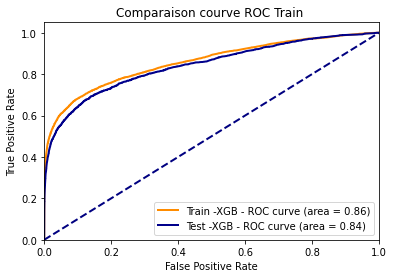

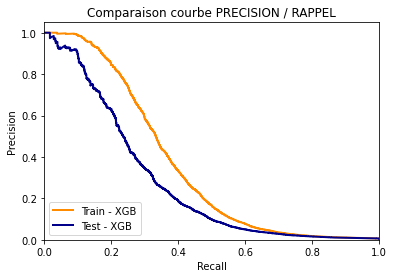

In [59]:
#Calcul des métriques

fpr_train_XGB, tpr_train_XGB, thresholds_train_XGB = roc_curve(Y_TL, xgb_clf.predict_proba(X_TL)[:,1])
roc_auc_train_XGB = auc(fpr_train_XGB, tpr_train_XGB)

fpr_test_XGB, tpr_test_XGB, thresholds_test_XGB = roc_curve(Y_test, xgb_clf.predict_proba(X_test2)[:,1])
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)

plt.figure()
lw = 2
plt.plot(fpr_train_XGB, tpr_train_XGB, color='darkorange',
         lw=lw, label='Train -XGB - ROC curve (area = %0.2f)' % roc_auc_train_XGB)
plt.plot(fpr_test_XGB, tpr_test_XGB, color='darkblue',
         lw=lw, label='Test -XGB - ROC curve (area = %0.2f)' % roc_auc_test_XGB)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_XGB, recall_train_XGB, thresholds_train_XGB = precision_recall_curve(Y_TL,
                                                                         xgb_clf.predict_proba(X_TL)[:,1])

precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(Y_test,
                                                                         xgb_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_XGB,precision_train_XGB, color='darkorange',
         lw=lw, label='Train - XGB')
plt.plot(recall_test_XGB,precision_test_XGB, color='darkblue',
         lw=lw, label='Test - XGB')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [60]:
Y_pred2=xgb_clf.predict(X_test2)
print(confusion_matrix(Y_test,Y_pred2))
print(classification_report(Y_test,Y_pred2))

[[343173     83]
 [  1890    284]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    343256
           1       0.77      0.13      0.22      2174

    accuracy                           0.99    345430
   macro avg       0.88      0.57      0.61    345430
weighted avg       0.99      0.99      0.99    345430



In [61]:
precision, recall, thresholds = precision_recall_curve(Y_test, xgb_clf.predict_proba(X_test2)[:,1])
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.136821, F-Score=0.326


## With class weight

In [51]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(class_weight='balanced'),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train2, Y_train)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
2579.6071570999998

 Paramètres optimaux : 
OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 8), ('n_estimators', 94)])

 Résultats  : 0.8128619433798816


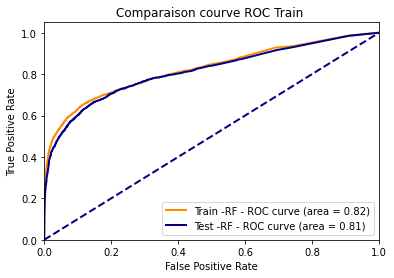

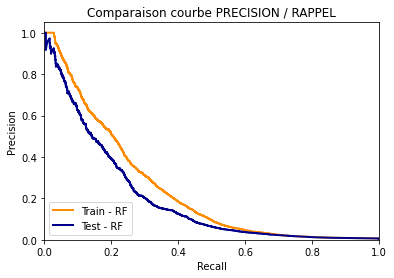

In [52]:
rf_clf = RandomForestClassifier(**opt.best_params_)

rf_clf.fit(X_train2,Y_train)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_train, rf_clf.predict_proba(X_train2)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_train,
                                                                         rf_clf.predict_proba(X_train2)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
                                                                         rf_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [53]:
importance_variable_rf = pd.DataFrame()
importance_variable_rf["Variable"]= X_train2.columns.tolist()
importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 10 variables les plus importantes : \n")
importance_variable_rf.head(10)

Les 10 variables les plus importantes : 



,Variable,Feature Importance
9,FM_Sum_24,0.157479
5,FM_Velocity_Condition_24,0.149347
8,FM_Sum_12,0.100389
4,FM_Velocity_Condition_12,0.099216
3,FM_Velocity_Condition_6,0.076712
7,FM_Sum_6,0.069556
2,FM_Velocity_Condition_3,0.049237
1,Montant,0.042685
18,FD,0.037342
13,FM_Redondance_MCC_24,0.034404


In [46]:
param_dict_XGB = {
    'objective':Categorical(['binary:logistic']),
    'booster':Categorical(['gblinear','gbtree','dart']), #,'gbtree','dart'
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'learning_rate' : Real(0.05,1, prior='uniform'),
    'label' : var_app}

opt = BayesSearchCV(xgb.XGBClassifier(class_weight='balanced'),param_dict_XGB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train2, Y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))


xgb_clf = xgb.XGBClassifier(**opt.best_params_)

xgb_clf.fit(X_train2,Y_train)

D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:35:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:35:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:37:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:37:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:39:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:39:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:41:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:41:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:42:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:42:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:44:44] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[12:44:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[12:44:53] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[12:44:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[12:45:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:45:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[12:45:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:45:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:45:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:45:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:46:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:46:31] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:47:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:47:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:48:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:48:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:49:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:49:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:49:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:49:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:50:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:50:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[12:50:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:50:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[12:50:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:50:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[12:50:15] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:50:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[12:50:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:50:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Users\alepi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[12:50:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "base_estimator", "class_weight", "label" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:50:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### 
 
 Durée de recherche en seconde :
991.2606715000002

 Paramètres optimaux : 
OrderedDict([('base_estimator', LogisticRegression()), ('booster', 'dart'), ('label', 'FM_Velocity_Condition_6'), ('learning_rate', 0.31099687670060944), ('objective', 'binary:logistic')])

 Résultats  : 0.824757748142925

XGBClassifier(base_estimator=LogisticRegression(), base_score=0.5,
              booster='dart', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              label='FM_Velocity_Condition_6',
              learning_rate=0.31099687670060944, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

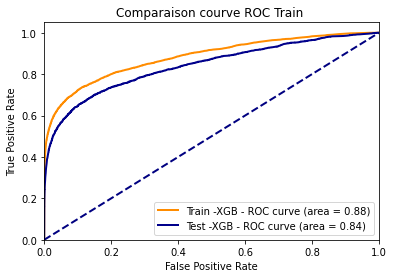

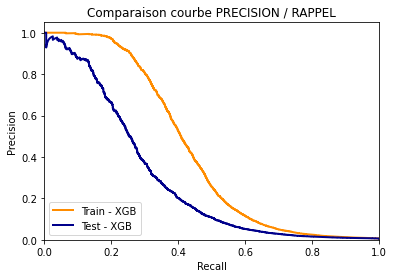

In [47]:
#Calcul des métriques

fpr_train_XGB, tpr_train_XGB, thresholds_train_XGB = roc_curve(Y_train, xgb_clf.predict_proba(X_train2)[:,1])
roc_auc_train_XGB = auc(fpr_train_XGB, tpr_train_XGB)

fpr_test_XGB, tpr_test_XGB, thresholds_test_XGB = roc_curve(Y_test, xgb_clf.predict_proba(X_test2)[:,1])
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)

plt.figure()
lw = 2
plt.plot(fpr_train_XGB, tpr_train_XGB, color='darkorange',
         lw=lw, label='Train -XGB - ROC curve (area = %0.2f)' % roc_auc_train_XGB)
plt.plot(fpr_test_XGB, tpr_test_XGB, color='darkblue',
         lw=lw, label='Test -XGB - ROC curve (area = %0.2f)' % roc_auc_test_XGB)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_XGB, recall_train_XGB, thresholds_train_XGB = precision_recall_curve(Y_train,
                                                                         xgb_clf.predict_proba(X_train2)[:,1])

precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(Y_test,
                                                                         xgb_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_XGB,precision_train_XGB, color='darkorange',
         lw=lw, label='Train - XGB')
plt.plot(recall_test_XGB,precision_test_XGB, color='darkblue',
         lw=lw, label='Test - XGB')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [48]:
Y_pred3=xgb_clf.predict(X_test2)
print(confusion_matrix(Y_test,Y_pred3))
print(classification_report(Y_test,Y_pred3))

[[343169     87]
 [  1846    328]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    343256
           1       0.79      0.15      0.25      2174

    accuracy                           0.99    345430
   macro avg       0.89      0.58      0.63    345430
weighted avg       0.99      0.99      0.99    345430



In [51]:
precision, recall, thresholds = precision_recall_curve(Y_test, xgb_clf.predict_proba(X_test2)[:,1])
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.164687, F-Score=0.341


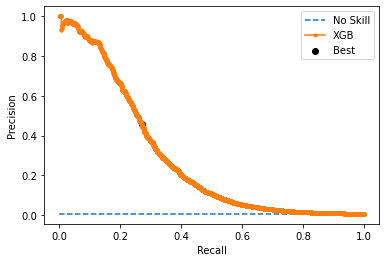

In [52]:
# plot the roc curve for the model
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='XGB')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show();

# ADABoost

In [56]:
X_trada = X_train2.drop(columns=["CodeRep","FM_Sum_3","FM_Redondance_MCC_3","FM_Redondance_MCC_6","FM_Redondance_MCC_12","FM_Difference_Pays_3","FM_Difference_Pays_6","FM_Difference_Pays_12","FM_Difference_Pays_24"])
X_testada = X_test2.drop(columns=["CodeRep","FM_Sum_3","FM_Redondance_MCC_3","FM_Redondance_MCC_6","FM_Redondance_MCC_12","FM_Difference_Pays_3","FM_Difference_Pays_6","FM_Difference_Pays_12","FM_Difference_Pays_24"])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

param_dict_AdaB = {
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'n_estimators' : Integer(10,50),
    'learning_rate' : Real(0.05,1, prior='uniform')}

opt = BayesSearchCV(AdaBoostClassifier(),param_dict_AdaB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_trada, Y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR ADABOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

ADA_clf = AdaBoostClassifier(**opt.best_params_)
ADA_clf.fit(X_trada,Y_train)

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\alepi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
#Calcul des métriques

fpr_train_ADA, tpr_train_ADA, thresholds_train_ADA = roc_curve(Y_train, ADA_clf.predict_proba(X_trada)[:,1])
roc_auc_train_ADA = auc(fpr_train_ADA, tpr_train_ADA)

fpr_test_ADA, tpr_test_ADA, thresholds_test_ADA = roc_curve(Y_test, ADA_clf.predict_proba(X_testada)[:,1])
roc_auc_test_ADA = auc(fpr_test_ADA, tpr_test_ADA)

plt.figure()
lw = 2
plt.plot(fpr_train_ADA, tpr_train_ADA, color='darkorange',
         lw=lw, label='Train -ADA - ROC curve (area = %0.2f)' % roc_auc_train_ADA)
plt.plot(fpr_test_ADA, tpr_test_ADA, color='darkblue',
         lw=lw, label='Test -ADA - ROC curve (area = %0.2f)' % roc_auc_test_ADA)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_ADA, recall_train_ADA, thresholds_train_ADA = precision_recall_curve(Y_train,
                                                                         ADA_clf.predict_proba(X_trada)[:,1])

precision_test_ADA, recall_test_ADA, thresholds_test_ADA = precision_recall_curve(Y_test,
                                                                         ADA_clf.predict_proba(X_testada)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_ADA,precision_train_ADA, color='darkorange',
         lw=lw, label='Train - ADA')
plt.plot(recall_test_ADA,precision_test_ADA, color='darkblue',
         lw=lw, label='Test - ADA')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [ ]:
Y_pred4=xgb_clf.predict(X_test2)
print(confusion_matrix(Y_test,Y_pred4))
print(classification_report(Y_test,Y_pred4))

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, ADA_clf.predict_proba(X_test2)[:,1])
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))